In [1]:
import torch
from torch.utils import data

from utils.dlc_practical_prologue import generate_pair_sets
from utils.metrics import accuracy
from utils.nn_utils import train_model

from models.LeNet import lenet
from models.LinearReluNet import linear_relu_net
from models.SimpleConvNet import simple_conv_net
from models.ResNet import residual_net
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from models.LinearReluNet import LinearReluNet

plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  

In [2]:
# Data related global variables
N = 1000  # Number of pairs

DATA_TENSORS = generate_pair_sets(N)

# Neural nets parameters
NN_ARGS = {"input_size": 14 * 14, "num_classes": 10}
BATCH_SIZE = 100
NUM_EPOCHS = 25

In [3]:
# Datasets
train_input,train_target,train_classes,test_input,test_target,test_classes = DATA_TENSORS

train_dataset = data.TensorDataset(train_input, train_classes)
test_dataset = data.TensorDataset(test_input, test_classes) 
    # Dataset Loader (Input Batcher)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

#TODO : LinearRelu (LinearReluNet(2*14*14, 1), 'LinearRelu')
models = [(lenet(), 'LeNet'), (simple_conv_net(), 'Simple Conv Net'), (residual_net(), 'Residual Net')]

In [4]:
def plot_train_test(model,  NUM_EPOCHS, train_loader,test_loader, flatten, model_title):
    losses, losses_t = train_model(model, NUM_EPOCHS, train_loader,test_loader, flatten)
    x = list(np.arange(1, NUM_EPOCHS+1))
    plt.figure(figsize=(15, 8))
    plt.plot(losses, '--', label = 'Training loss')
    plt.plot(losses_t, '--', label = 'Test loss')
    plt.legend()
    plt.ylabel('Average Cross Entropy Loss')
    plt.xlabel("Number of epochs")
    plt.title('Cross entropy loss vs number of epochs using ' + model_title);

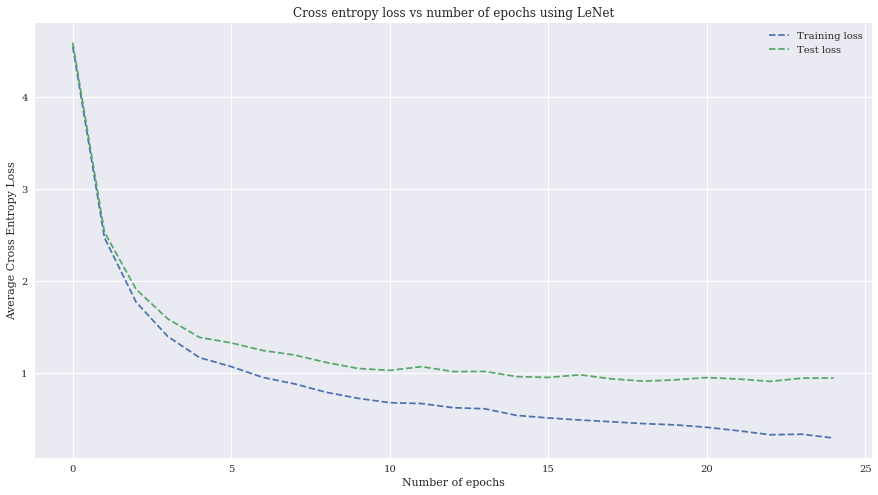

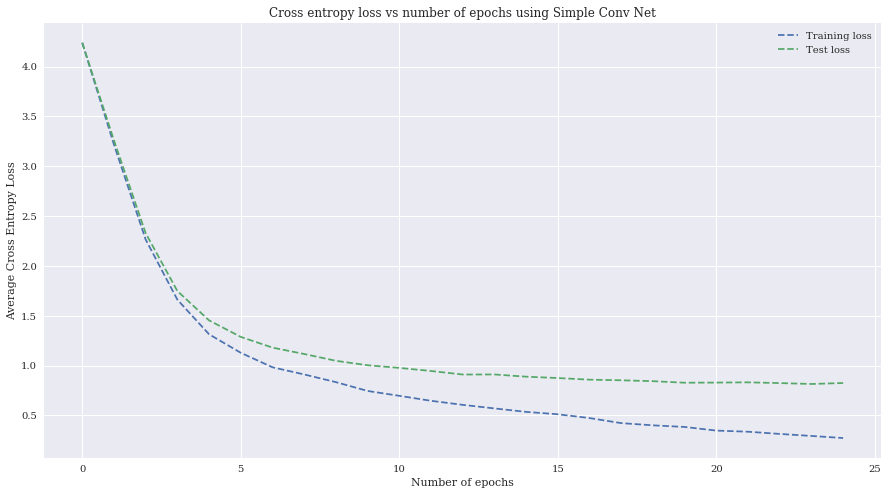

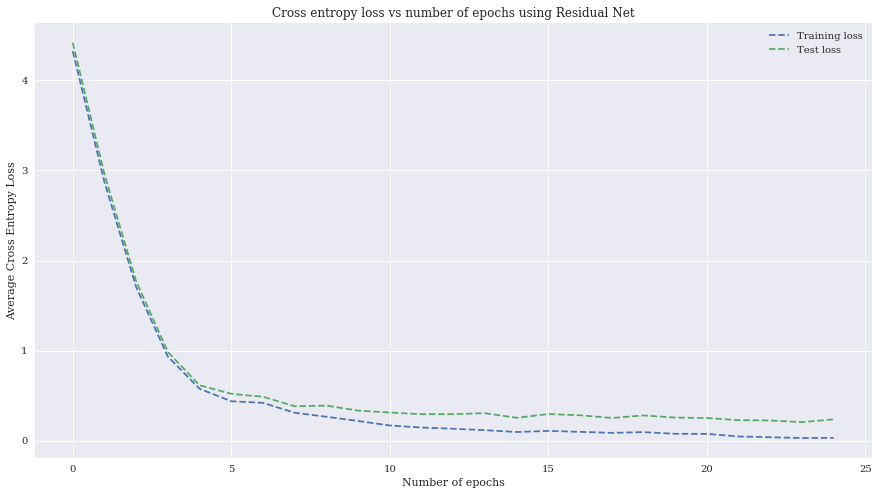

In [5]:
for m in models :
    plot_train_test(m[0], NUM_EPOCHS, train_loader, test_loader,False, m[1])

In [6]:
test_accuracy_d = data.TensorDataset(test_input, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_accuracy_d, batch_size=BATCH_SIZE, shuffle=False)
for m in models :
    print('The accuracy for ' + m[1] + ': {}'.format(accuracy(m[0], test_loader, flatten=False)))

The accuracy for LeNet: 0.908
The accuracy for Simple Conv Net: 0.903
The accuracy for Residual Net: 0.976
